In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import seaborn as sn

import matplotlib.pyplot as plt

plt.style.use('ggplot')

#Importing the datafram from cleaning file
%run cleaning.ipynb

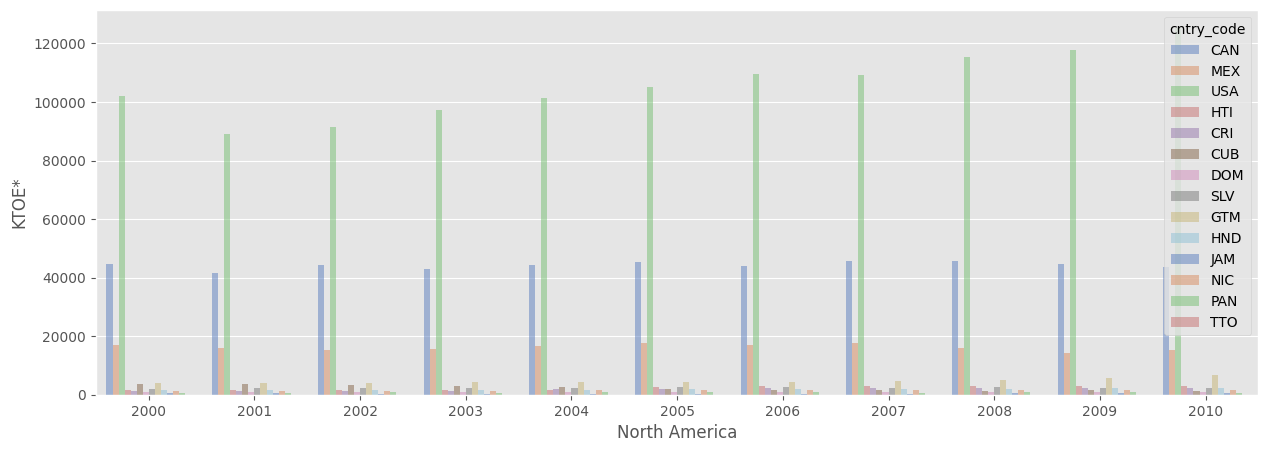

In [7]:
merged_df = clean_up()

#Exploratory Plots
dfp = merged_df.copy()
dfp = merged_df[merged_df['measure']=='KTOE']

#Filtering DF with the location requeried
#cntry = ['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN']
#filtered_loc = dfp[dfp['cntry_code'].isin(cntry)]


#FIltering DF from 1960 until 2000
dfp = dfp[(dfp['time'] >= '2000-01-01') & (dfp['time'] <= '2010-12-31')]
dfp = dfp[dfp['cntry_region'] == 'North America']


fig, ax = plt.subplots(figsize=(15,5))
sn.barplot(data=dfp,x='year',y='value',hue='cntry_code',ax=ax,palette='muted', alpha=.5)
#sn.lineplot(data=dfp,x='year',y='value',hue='cntry_code',ax=ax)
#sn.relplot(x="cntry_code", y="value", hue="cntry_region", size="year",sizes=(20,30), alpha=.5, palette="muted", height=6, data=dfp)


ax.set_xlabel('North America')
ax.set_ylabel('KTOE*')
plt.show()

In [21]:
#Sorting the data by continent
df_filtered = merged_df[merged_df['cntry_code'] == 'AUS']

df_cntry = df_filtered[['year','value']]
#df_cntry = df_cntry.set_index('year')
df_cntry = df_cntry.groupby('year').sum()

df_cntry.head()

,value
year,
1960,4451.022
1961,4504.260
1962,4420.027
1963,4641.608
1964,4509.416


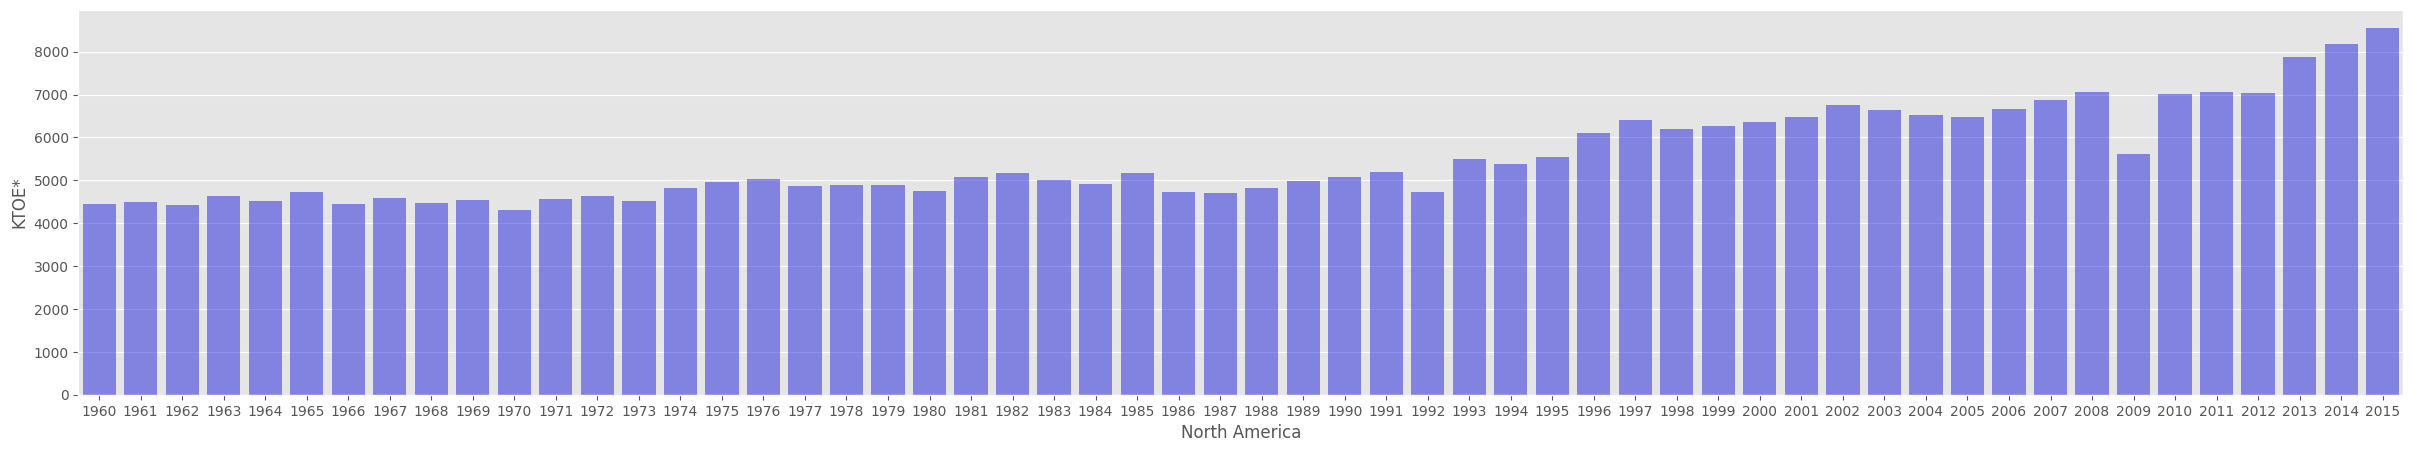

5531.093124999999


In [22]:
#Ploting the sum from North America
fig, ax = plt.subplots(figsize=(30,5))
sn.barplot(data=df_cntry,x=df_cntry.index,y='value',ax=ax, alpha=.5,color='blue')
#sn.lineplot(data=dfp,x='year',y='value',hue='cntry_code',ax=ax)
#sn.relplot(x="cntry_code", y="value", hue="cntry_region", size="year",sizes=(20,30), alpha=.5, palette="muted", height=6, data=dfp)


ax.set_xlabel('North America')
ax.set_ylabel('KTOE*')
plt.show()

print(df_cntry['value'].mean())

In [ ]:
'''
################# THIRD SECTION
sec_3 = st.container()

#Section 1 - Header
sec_3.subheader('Mapa Mundi', divider='grey')


map_gdp = px.scatter_geo(merged_df, locations='cntry_code', color="cntry_region", hover_name="cntry_name", size="gdp",animation_frame="year", projection='natural earth')
sec_3.plotly_chart(map_gdp, use_container_width=True)
'''
